# Deliverable 3: Project Report
#### Group 3 - Aden Chan, Kashie Ugoji, Linda Han, Sungha Choi
--------------

## Introduction

#### Does the average final grade of high school students who do extracurricular activities differ from those who do not?

Every year there are graduating students from middle school, ready to be a part of the incoming batch of freshmen for high school. One of the biggest challenges students might face in high school is not only the increase in difficulty, but the variety of courses available. Many students in middle school partake in various extracurricular activities, such as sport teams or various clubs, and it is natural to assume that some may struggle with juggling the additional courseload as well as maintaining participation in existing activites. Indeed, with some studies suggesting that engaging in too many extracurriculars can lead to worse academic performance (Wilson 2009), some parents may have their children drop their extracurriculars in high school to focus more on academic performance. However, does this actually make a difference? This report will attempt to find if there is a statistically significant difference between the average grades of students who partake in extracurriculars, and those who do not. To do this, a dataset which contains the **final Math grade scores** for students belonging to two high schools in Portugal will be analyzed and the **mean** score of students who are partaking in extracurriculars will be calculated and compared to those who do not. Using the calculated information, whether a difference between the two groups will be determined and if so, the significance of the difference will be calculated. This report will assume that this dataset for students in Portugual is representative of high school students around the world and that achievement in mathematics is a good representation of overall academic performance - an assumption which is backed through various studies (Duncan et al. 2007). These assumptions will allow for the findings of this report to be generalized. 

<img src="https://media.istockphoto.com/id/1307457391/photo/happy-black-student-raising-arm-to-answer-question-while-attending-class-with-her-university.jpg?s=612x612&w=0&k=20&c=iZaZFyC-WqlqSQc4elqUNPTxLvWPe8P5Tb_YdZnrI9Q="></img>

<i>Image from iStock by Getty Images</i>

## Methods: Plan

The choice of data from the Portuguese schools is directly relevant to the research question and the dataset contains neccesary features to analyze student achievement. Using hypothesis testing and confidence intervals, this report ensures that the findings are robust and not reliant on a single method. This reduces the risk of drawing incorrect conclusions. The analysis process is fully documented and open-access via the web, facilitating reproducibility. 

While the generated plots and point estimates in the initial stage offer valuable preliminary observations, they inherently lack statistical significance and do not adequately disprove that the results obtained were not due to sampling variation. Hypothesis testing and confidence intervals provide quantitative measures of reliability and validity, offering a more comprehensive and statistically grounded evaluation of research questions.

These deficiencies will be addressed by conducting a statistical analysis comparing the difference in means to determine if the results hold any significance.

#### Hypothesis Testing

Hypothesis testing for a difference in means will be used with a **confidence level of 95%** and a **significance level of 5%**. Let $\bar{x}_1$ represent the mean academic score of students participating in regular extracurricular activities and $\bar{x}_2$ represent the mean academic score of students who do not participate in regular extracurricular activities. The proposed hypothesis test is as follows:

$$\mathbf{H_0}: \bar{x}_1 - \bar{x}_2 = 0$$
$$\mathbf{H_a}: \bar{x}_1 - \bar{x}_2 \neq 0$$

This will be accomplished via both the bootstrapping and asymptotic methods. Based off our findings, a determination will be made on which method should be the most appropriate for this study.

#### Confidence Interval 

A confidence interval will be calculated to provide a range of plausible values for the true value of the difference in population means. This will be calculated with a level of 95% using the formula:

$$CI = (\bar{x}_1 - \bar{x}_2) \pm (z^* * \sigma_M)$$

where $z^*$ is the critical value associated with the chosen confidence level, and $\sigma_M$ is the standard error of the difference in means.

#### Expected Findings

Based on our preliminary analysis, it is anticipated that the data **will not support** the finding that participation in extracurricular activities has a *significant* impact on students' academic performance and that differences in academic achievement between groups may be due to sampling variation. Should this prediction be confirmed through statistical analysis, it may ease parental concerns about enrolling their children in extracurriculars, allowing these children to reap the benefits of extracurricular activities. Studies have shown that teens who participate in extracurricular activities show better mental health, social skills and interpersonal skills (Oberle et al., 2020). This leads to further questions about what factors influence students' academic performance and separate analysis of the other social factors recorded in this dataset may reveal other potential factors, such as household income, parental relationship, access to outside academic support, and more.

## Results

#### 1. Importing libraries

To start doing exploratory data analysis, all the necessary libraries are loaded.

In [21]:
# Import tidyverse library
library(tidyverse)

# For the infer workflow
library(infer)

# For the asympotic test
library(broom)

#### 2. Importing dataset

The dataset of interest is "student-mat.csv", and it contains demographic, family, personal attributes, and academic performance information about **students in math classes from two Portuguese high schools** (Cortez, 2014).

Below, the dataset is downloaded, extracted and parsed from a URL. The resulting dataset will be loaded into an data frame called `students`.

In [22]:
# Downloads the zipfile containing the dataset if it doesn't already exist 
# and saves it to the current working directory as "dataset-zip"
url <- "https://archive.ics.uci.edu/static/public/320/student+performance.zip"
destfile <- "./dataset-zip" 

if (!file.exists(destfile)) {
    download.file(url, destfile)
    
    # Unzips the zipfile and extracts the dataset to current working directory
    unzip(destfile, files = "student.zip") %>% unzip(files = "student-mat.csv")
}

# Read the dataset and name it `students`
students <- read_delim("./student-mat.csv", delim = ";")
head(students)

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


#### 3. Wrangling the dataset

Now that the dataset has been successfully loaded, it is wrangled to the desired format for this project.

Grades in Portugal are distributed on a scale of 0-20 with 18-20 being excellent in international standards (Universidade Portucalense, 2022) . According to the description provided in the documentation, the column `G3` in the dataset represents the students' final grade:

> G3 - final grade (numeric: from 0 to 20, output target)

To make `G3` more readable, it is renamed to `final_grade`. The two columns most relevant to the inferential question - `activities`, and the newly mutated column `final_grade` - were selected.

In [23]:
# Wrangle the dataset
students_sample <- students %>%
    mutate(final_grade = G3) %>%
    select(activities, final_grade)

head(students_sample)

activities,final_grade
<chr>,<dbl>
no,6
no,6
no,10
yes,15
no,10
yes,15


#### 4. Gaining insight about the dataset

Once again, the report is concerned with finding the **average grade of students who do extracurricular activities** and the **average grade of those who do not**. 

First, some initial insights about the dataset are obtained.

In [24]:
# Count the total number of students
nrow(students)

[1] 395

In [25]:
# Ensure there are no NA values
nrow(students_sample %>% filter(is.na(final_grade) | is.na(activities)))

[1] 0

In [26]:
# Count the number and proportion of students in each category
count(students, activities) %>%
mutate(prop = n / nrow(students))

activities,n,prop
<chr>,<int>,<dbl>
no,194,0.4911392
yes,201,0.5088608


This is done in order to gain better perspective for the upcoming analysis. By looking at the proportions of the groups, more context is obtained as to how accurate the statistics might be as an extremely small proportion may produce an unreliable statistic due to outliers. From above, it is observed that there are a total of 395 students in the dataset, and out of those students **49%** of them **do not** do extracurriculars while the other **51%** of them **do**.

Various summary statistics for student final grades in each of the respective categories are also calculated. Based on the output, similar valued statistics betweeen the two groups are found, which seems to suggest that there is no correlation between doing extracurricular activities and final grade.

In [27]:
# Create a summary table for the dataset
(prelim_summary <- students_sample %>%
            group_by(activities) %>%
            summarize(sample_mean = mean(final_grade),
            sample_median = median(final_grade),
            sample_var = var(final_grade),
            sample_sd = sd(final_grade),
            sample_max = max(final_grade),
            sample_min = min(final_grade),
            n = n()))

activities,sample_mean,sample_median,sample_var,sample_sd,sample_max,sample_min,n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
no,10.34021,11,20.14273,4.488065,19,0,194
yes,10.48756,11,21.90109,4.679861,20,0,201


#### 5. Visualizing the dataset

Using two side-by-side histograms, the distribution of final grades by `activities` type are compared. 

The general shape of the grade distribution is found to be similar for both categories. The **mean grade** for both categories appears to be around 10 as seen above, and there are quite a few number of students who received a final grade of 0.

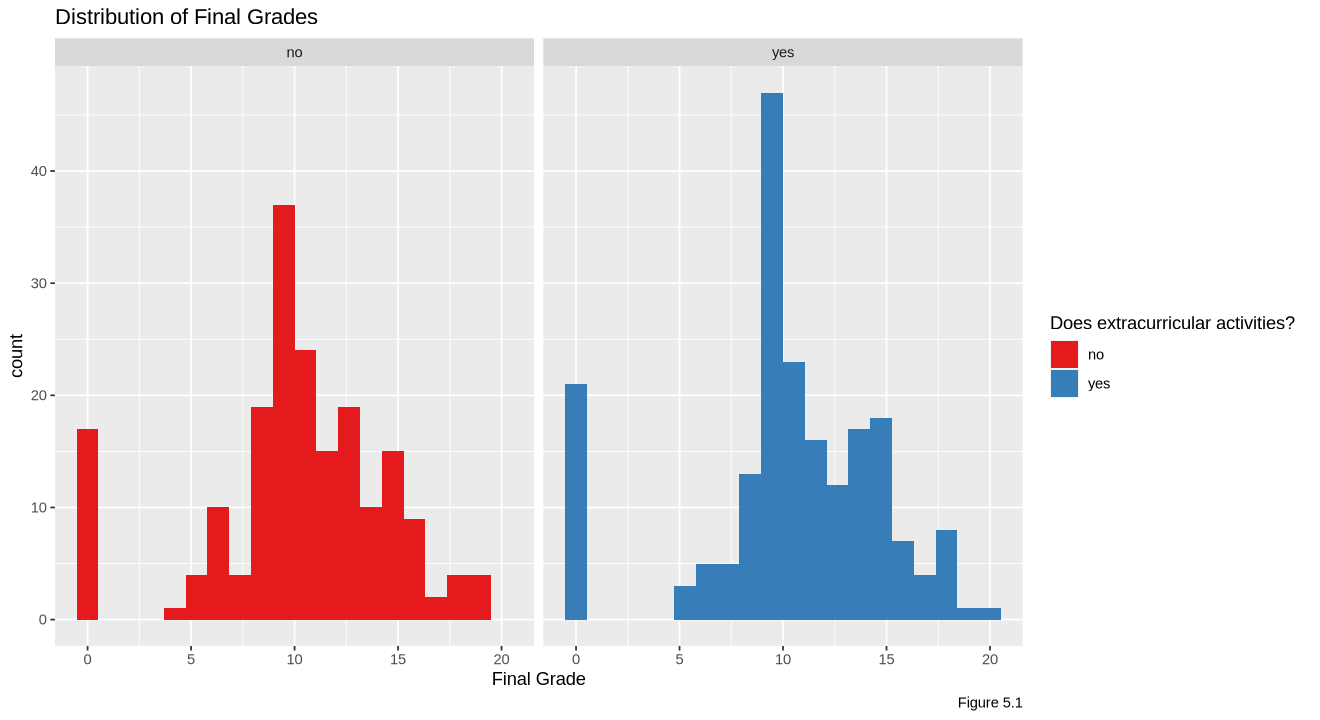

In [38]:
# Create a histogram to visualize the distribution of grades
options(repr.plot.width = 11, repr.plot.height = 6)
students_grade_dist <- students_sample %>% 
    ggplot(aes(x = final_grade, fill = activities)) +
    geom_histogram(bins = 20) + 
    facet_wrap(~ activities) + 
    labs(x = "Final Grade",
        title = "Distribution of Final Grades",
        fill = "Does extracurricular activities?",
        caption = "Figure 5.1") +
scale_fill_brewer(palette = "Set1") 
students_

To further compare the distribution of final grades between the two categories, a box plot is generated. Once again, it is found that they have very similar means.

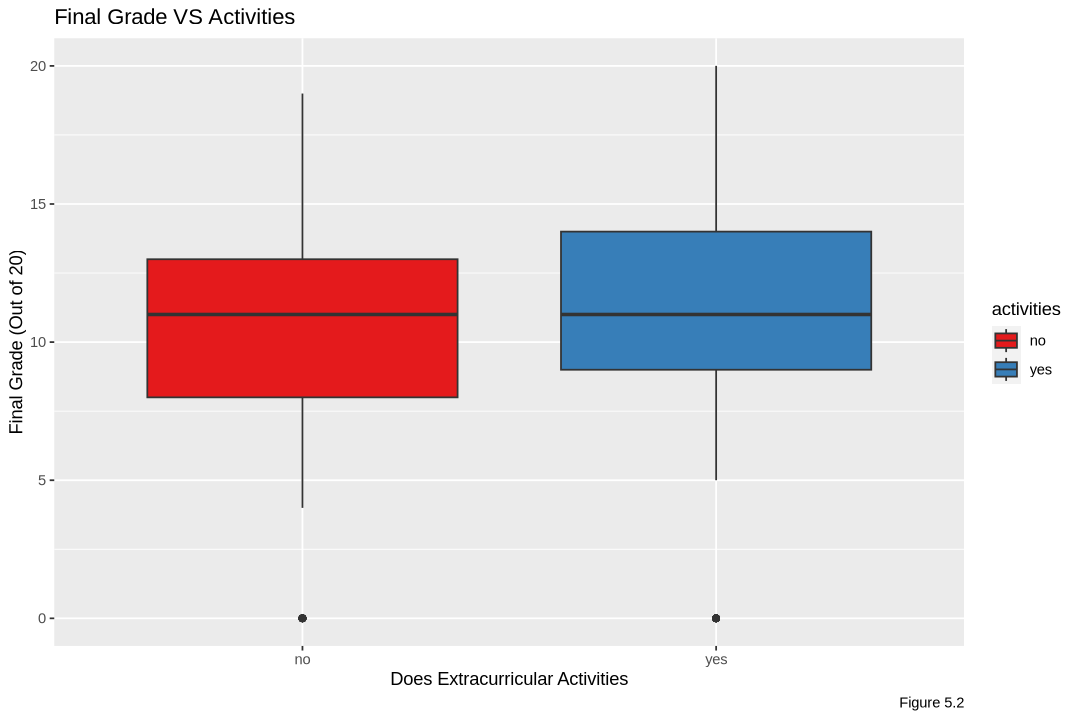

In [29]:
# Create a box plot to compare the distribution of grades between the two categories
options(repr.plot.width = 9, repr.plot.height = 6)
(students_grade_boxplot <- students_sample %>%
    ggplot(aes(x = activities, y = final_grade, fill = activities)) +
    geom_boxplot() + 
    labs(x = "Does Extracurricular Activities",
        y = "Final Grade (Out of 20)", 
        title = "Final Grade VS Activities",
        caption = "Figure 5.2")) +
scale_fill_brewer(palette = "Set1") 

With the boxplots, it becomes more apparent that the **final grade IQR endpoints** for students in the `yes` category are higher than that of students in the `no` category (excluding the outliers with a grade of 0).

#### 6. Hypothesis testing via the bootstrapping method

To perform hypothesis testing about the difference in the means, a bootstrapping method with a **5% significance level** is performed using the `infer` library.

Let $\bar{x}_1$ represent the mean grade of students **participating** in extracurricular activities and $\bar{x}_2$ represent the mean grade of students who **do not participate** in extracurricular activities. 

The hypotheses are as follows:

$$\mathbf{H_0}: \bar{x}_1 - \bar{x}_2 = 0 $$
$$\mathbf{H_a}: \bar{x}_1 - \bar{x}_2 \neq 0$$

In [30]:
# First, the observed test statistic is calculated
(bootstrap_test_stat <- students_sample %>%
    specify(formula = final_grade ~ activities) %>%
    calculate(stat = "diff in means", order = c("yes", "no")))
print("Table 6.1")

stat
<dbl>
0.147356


[1] "Table 6.1"


In [31]:
# Set the seed for reproducibility
set.seed(1000)

# Then, a null distribution is generated
bootstrap_null_dist <- students_sample %>%
    specify(formula = final_grade ~ activities) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("yes", "no"))

head(bootstrap_null_dist)
print("Table 6.2")

replicate,stat
<int>,<dbl>
1,0.75514182
2,-0.70354413
3,-0.69341437
4,-0.21731548
5,0.29930246
6,0.01566908


[1] "Table 6.2"


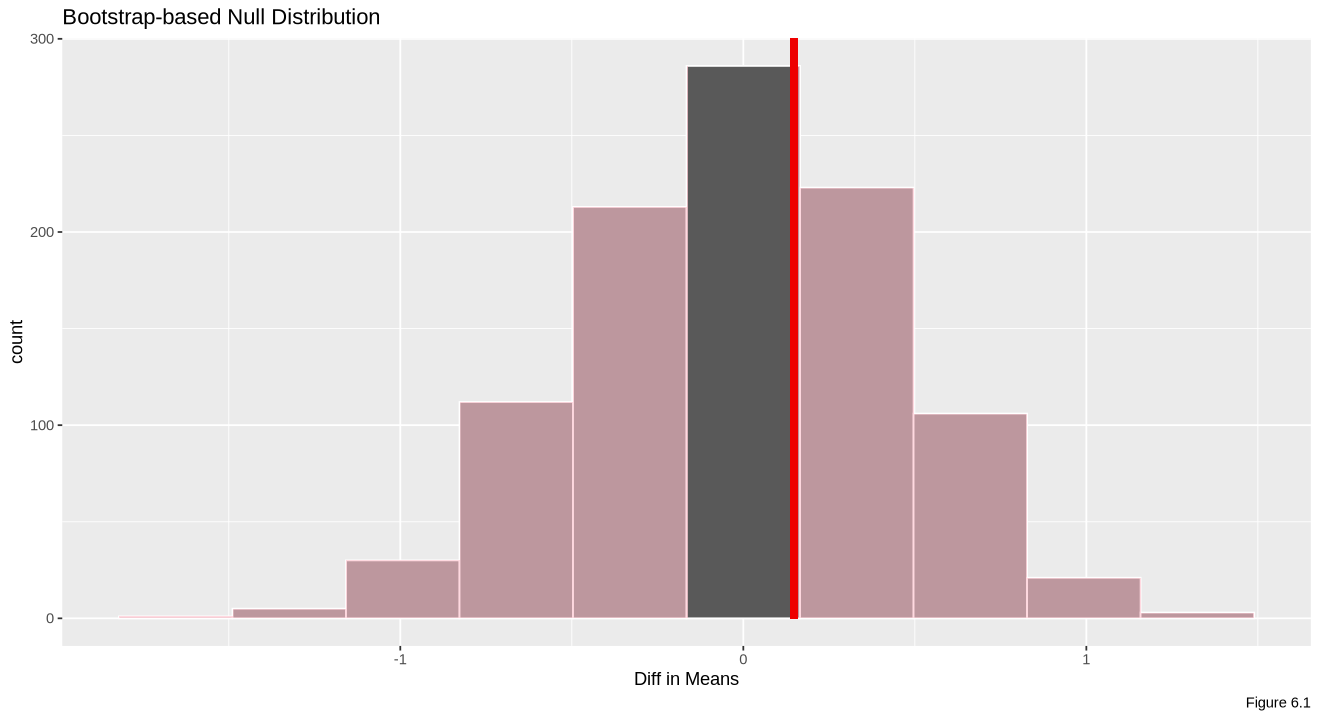

In [41]:
# We now visualize the results of the hypothesis test (i.e. the null distribution and the test statistic)
(bootstrap_dist_plot <- bootstrap_null_dist %>%
    visualize(bins = 10) + 
    shade_p_value(bootstrap_test_stat, direction = "both") +
    labs(x = "Diff in Means",
         title = "Bootstrap-based Null Distribution",
        caption = "Figure 6.1"))

In [33]:
# Obtain the p-value
(bootstrap_p_val <- bootstrap_null_dist %>%
    get_p_value(obs_stat = bootstrap_test_stat, direction = "both"))
print("Table 6.3")

p_value
<dbl>
0.742


[1] "Table 6.3"


Given the p-value of 0.742 obtained from the hypothesis test above, the null hypothesis is **not rejected** at the 5% significance level. This leads to the conclusion that there is insufficient statistical evidence to suggest that the mean grades of the two groups are different. Given that null hypothesis was not rejected, a risk of commiting **Type II error** exists.

In [34]:
# Find a 95% confidence interval for the difference in mean
(bootstrap_ci <- bootstrap_null_dist %>%
    get_ci(level = 0.95))
print("Table 6.4")

lower_ci,upper_ci
<dbl>,<dbl>
-0.9263989,0.8260502


[1] "Table 6.4"


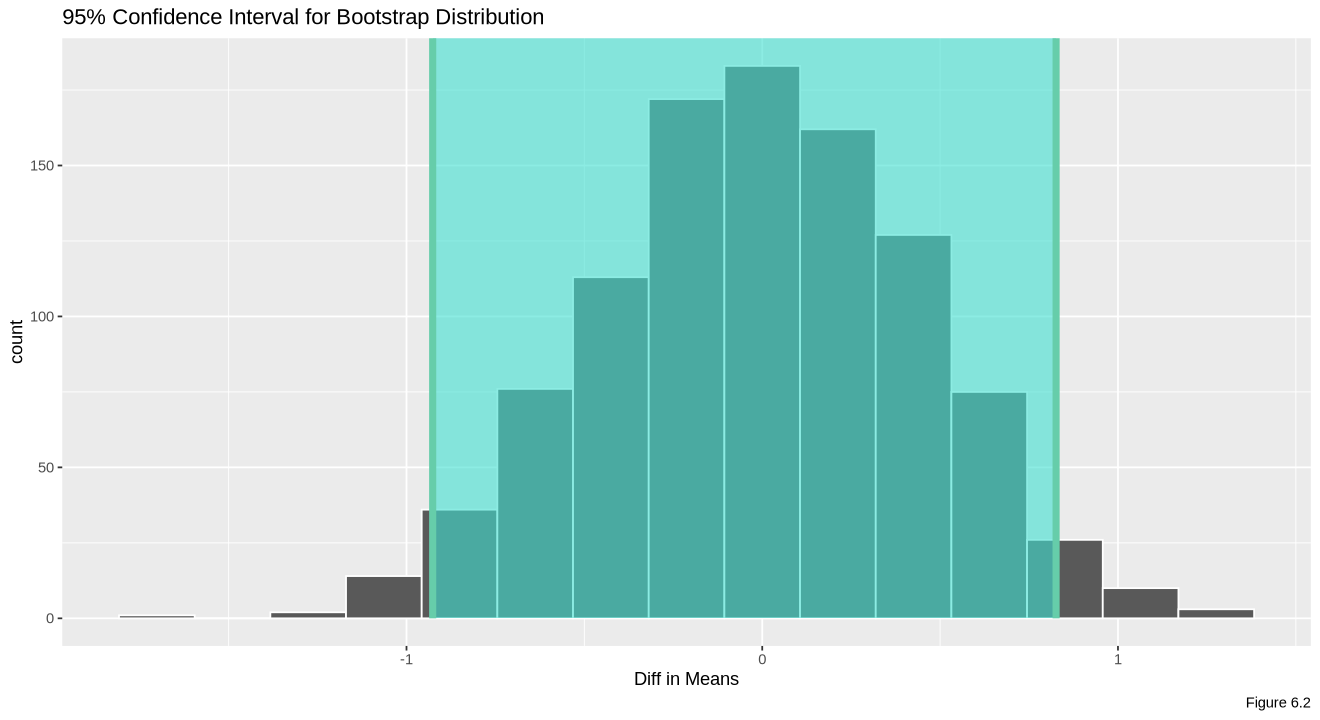

In [40]:
# Visualize the confidence interval
(bootstrap_ci_plot <- bootstrap_null_dist %>%
    visualize() + 
    shade_ci(endpoints = bootstrap_ci) +
    labs(x = "Diff in Means",
         title = "95% Confidence Interval for Bootstrap Distribution",
         caption = "Figure 6.2"))

*Comment by Aden (REMOVE BEFORE SUBMISSION) - This is the incorrect definition of the CI as per the slides, we need to change this to show that if this workflow was repeated multiple times, the true population paramater will be captured 95% of the time*
Based on the results above, we are **95% confident** that the **true difference** in population means is captured within the $[-0.9263989, 0.8260502]$ interval.

#### 7. Hypothesis testing via the asymptotic method

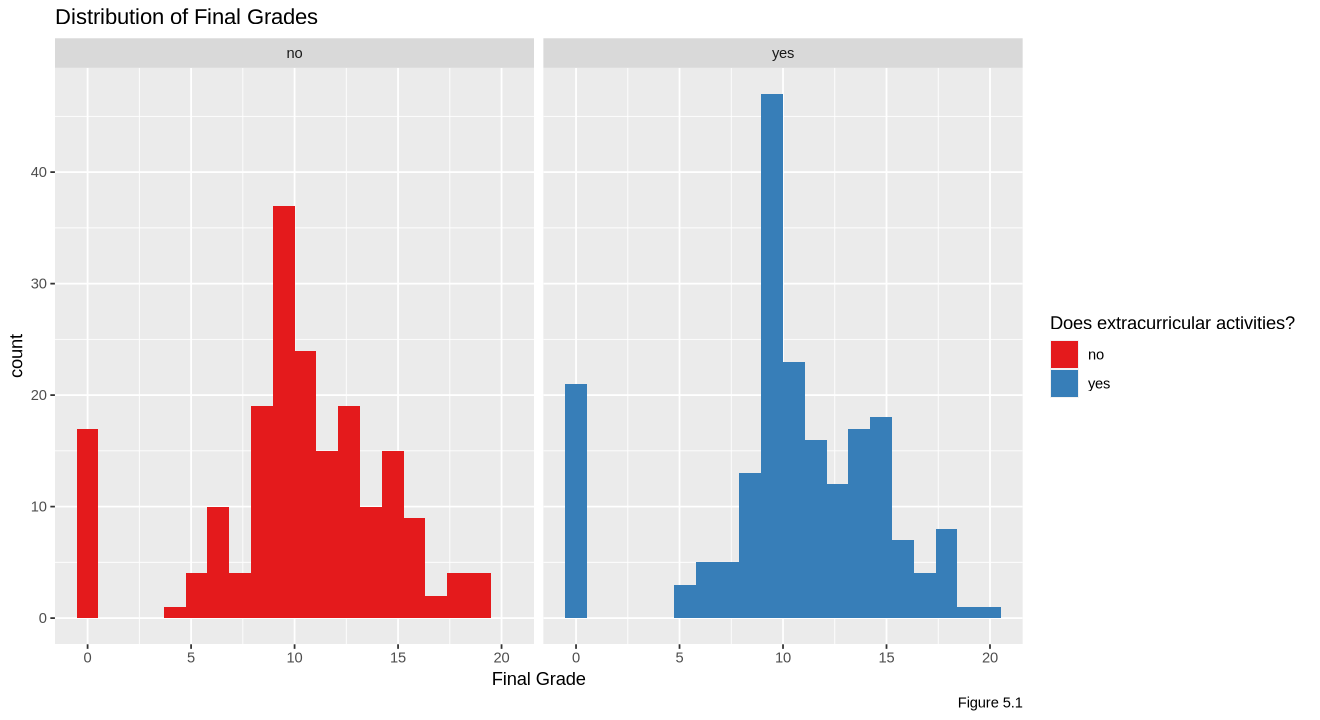

In [39]:
# Let's visualize the distribution of our data again
students_grade_dist

While the distributions appear somewhat normal (disregarding the spike at 0), it is uncertain if the *populations* are normally distributed. When making a t-test, one of the assumptions made is that the population distributions should be normal. As the normality of the population distribution is uncertain, using the CLT an assumption can be made that the sampling distribution will approach normality as the number of samples increases. In order for this assumption to hold, our sample size should be **sufficiently large** (at least $n > 30$), which both of them do. 


The data summary is examined again to determine the appropriateness of using the asymptotic method.

In [18]:
prelim_summary

activities,sample_mean,sample_median,sample_var,sample_sd,sample_max,sample_min,n
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
no,10.34021,11,20.14273,4.488065,19,0,194
yes,10.48756,11,21.90109,4.679861,20,0,201


Based on this information, a two-sample t-test will be conducted to determine if the difference in sample means are statistically significant. A **significance level of 5%** will be used. As it is not assumed that there are equal variances within the populations and coupled with our unequal sample sizes, using a Welch's t-test is most appropriate.

The hypotheses being tested are the same as in Section 6, namely:

$$\mathbf{H_0}: \bar{x}_1 - \bar{x}_2 = 0 $$
$$\mathbf{H_a}: \bar{x}_1 - \bar{x}_2 \neq 0$$

In [18]:
asymp_test <- t.test(final_grade ~ activities, data = students_sample, alternative = "two.sided") |>
              tidy()

asymp_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.147356,10.34021,10.48756,-0.3194428,0.7495605,392.9844,-1.054262,0.7595503,Welch Two Sample t-test,two.sided


The test returns a p-value of **0.7496**, which represents the probability of seeing the observed samples assuming the null hypothesis is correct. Given the p-value is **greater** than our significance level, the null hypothesis **cannot** be rejected. By doing so, there is a risk of committing a **Type II error**.

#### 8. Appropriateness of Bootstrapping and Asymptotic Method

Considering that both the bootstrapping and asymptotic methods were used, it is necessary to explain which would be more effective or appropriate. Though the two hypothesis methods produced similar p-values that both resulted in not rejecting the null, there are still some factors that must be taken into consideration. As the shape of the population distributions are not fully known, it is impossible to state with certinaty that that the sample came from a normal population distribution. To offset this, the assumptions for the t-test were that since the samples somewhat resemble a normal distribution and that the sample sizes are both greater than 30, our sampling distribution should theoretically approach normality as the number of samples increases(CLT). However, by making this assumption there is a risk of losing accuracy in terms of the t-distribution which could result in a less accurate calculation for the p-value. With this in mind, it makes more sense to use the bootstrapping method as it does not require such assumptions to be made. 

## Discussion

### **TODO**
#### **Summary of Findings/Implications and Impact**
The research aimed to investigate whether the average final grades of high school students who participate in extracurricular activities differ from those who do not. The analysis involved comparing the mean academic scores of students in both categories using hypothesis testing, confidence intervals, and the asymptotic method.
The exploratory data analysis of grade distributions, histograms, and box plots suggested similarities in the mean grades for both categories. Hypothesis testing using the **bootstrapping method** yielded a **p-value of 0.742**, indicating no significant difference in mean grades between students with and without extracurricular activities. As mentioned before, we are 95% confident that the true difference in population means is captured within the $[−0.9263989,0.8260502]$ interval (*COMMENT (ADEN) - SEE ABOVE ABOUT THIS STATEMENT*). Hypothesis testing via the **asymptotic method** (Welch’s t-test) also failed to reject the null hypothesis, with a **p-value of 0.7496**.
The findings suggest that, based on the dataset from Portuguese high schools, there is **insufficient statistical evidence to conclude that participating in extracurricular activities significantly influences average final grades**. Parents and educators may find reassurance that encouraging or allowing students to engage in extracurricular activities might not negatively impact their academic performance.
 

#### **Expectations & Results**
The results of the hypothesis testing align with the expectations set during exploratory data analysis, indicating that there was no unexpected deviation from the anticipated outcome. The exploratory data analysis through grade distributions suggested a trend that foreshadowed this result. As tested by both the bootstrapping method and the asymptotic method, the absence of a significant difference in mean grades between students who participate in extracurricular activities and those who do not was consistent with our preliminary observations.


#### **Potential Future Questions or Research Ventures** 
The information found in the report does not support the conclusion that the mean grade of students who participated in extracurricular activities was different from those who did not. Despite this result, the report does not necessarily **prove** that these two factors are not correlated. A common conclusion that previous studies have deduced was that extracurriculars themselves do not have a negative impact on academic performance however, **the amount of extracurriculars can** (Wilson 2009). Further research could be explored into this aspect of study with perhaps running a **regression analysis** to see at which number of extracurriculars would result in certain levels of academic performance. This study could be extremely beneficial if given enough predictor variables (such as the amount of time these extracurriculars take up, or the type of activities they are). By finding the largest amount of extracurriculars that also produce the best academic performance this could give a better blueprint for parents to not completely remove their kids from their extracurriculars, but to also not swamp them in too many. 


## References
Universidade Portucalense (2022). Portuguese Grading System. University of Porto. https://www.upt.pt/en/home/internationals/portuguese-grading-system-2/

Cortez,Paulo. (2014). Student Performance. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

Oberle, E., Ji, X. R., Kerai, S., Guhn, M., Schonert‐Reichl, K. A., & Gadermann, A. M. (2020). Screen time and extracurricular activities as risk and protective factors for mental health in adolescence: A population-level study. Preventive Medicine, 141, 106291. https://doi.org/10.1016/j.ypmed.2020.106291 

G.Duncan, C. Dowsett, A. Classens, K. Magnuson, A. Huston, P. Klebanov, L. Pagani, L. Feinstein, M. Engel, J. Brooks-Gunn, H. Sexton, K. Duckworth (2007). School Readiness and Later Achievement: Developmental Psychology, Vol 23 (pg 1428, 1446) DOI: 10.1037/0012-1649.43.6.1428 

N. Wilson (2009). Impact of Extracurricular Activities on Students. https://www2.uwstout.edu/content/lib/thesis/2009/2009wilsonn.pdf 
